In [1]:
import numpy as np

from scipy import constants

#visuals
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
matplotlib.rcParams.update({'font.size': 10})

#Interactive
from ipywidgets.widgets import * 
import ipywidgets as widgets

#take time, for checking if vectorization/program is useful
import time

#Hugo code
import kex_headers
import kex_data
import petlink
import representation
import position
import listmode

In [2]:
#plan
#get one timeslice of LM data
#get the corresponding normalization sinogram
#calculate the histogram bins
#calculate image bins
#add histogram points weighted by the normalization component
#time it

In [3]:
listmode_dataset, listmode_paths = kex_data.listmode()
sino_dataset, sino_paths = kex_data.sinograms()
recons, recon_paths = kex_data.reconstructions()
normfactor_dataset, normfactor_paths = kex_data.get_norm_factors()
event_counts = 1000*1000
# do not process all data initially
listmode_sub = []
for lm in listmode_dataset:
    listmode_sub.append(lm[:event_counts])

In [4]:
dictionaries = []
for k, list_data in enumerate(listmode_sub):
    dictionaries.append(listmode.get_fov_image_bins(list_data))

print(dictionaries[k].keys())

dict_keys(['is_event', 'events', 'tof_lor', 'is_prompt', 'prompts', 'prompt_image_bins', 'is_image_fov', 'fov_image_bins'])


In [19]:
com = []
direct_com = []
tof_com = []
for k, d in enumerate(dictionaries):
    com.append(position.listmode_center(d['fov_image_bins']))
    direct_com.append(position.listmode_center(direct_image_bins[k]))
    tof_com.append(position.listmode_center(tof_image_bins[k]))
    print("listmode com", com[k])
    print("direct com", direct_com[k])
    print("tof_0 com", tof_com[k])

listmode com [ 54.36204114  99.84938843 100.31305445]
direct com [ 54.52020891  99.88618029 100.40031477]
tof_0 com [ 54.33090389 100.17270711 130.2183634 ]
listmode com [ 54.32297772 109.18529324 100.26860277]
direct com [ 54.58729681 109.08645822 100.22582825]
tof_0 com [ 54.50350662 110.42671943 128.77274911]
listmode com [ 47.92823169 119.76035429  99.16691517]
direct com [ 47.88856912 119.42996393  99.13983791]
tof_0 com [ 51.55097029 116.93615164 123.09823716]
listmode com [ 47.93527083 136.4538814   99.02526103]
direct com [ 47.8242421  136.03039182  99.00502774]
tof_0 com [ 47.58211302 146.5541033  104.96144582]


In [20]:
for d in dictionaries:
    print("histo. image com", position.listmode_center(d['fov_image_bins']))

histo. image com [ 54.36204114  99.84938843 100.31305445]
histo. image com [ 54.32297772 109.18529324 100.26860277]
histo. image com [ 47.92823169 119.76035429  99.16691517]
histo. image com [ 47.93527083 136.4538814   99.02526103]


In [21]:
recon_com = []
for k,r in enumerate(recons):
    recon_com.append(position.center_of_mass(r))
    print("recon com", recon_com[k])

recon com (54.54506671013993, 99.88068266317335, 100.24432682118665)
recon com (54.481116045841475, 109.80538882233014, 100.19990990583808)
recon com (47.5012789338229, 120.45245851191282, 99.0732076186318)
recon com (47.53629536274702, 137.43006472480766, 99.00728627556309)


In [22]:
image_histograms = []
for d in dictionaries:
    image_histograms.append(listmode.get_histogram(np.array(d['fov_image_bins'], dtype=int),kex_headers.IMAGE_SHAPE))

In [23]:
z_slice_widget = widgets.IntSlider(min=0, max=image_histograms[0].shape[0], value=50)


def f(z):
    plt.figure(figsize=(20,20))
    for k,h in enumerate(image_histograms):
        plt.subplot(2,len(image_histograms)/2,k+1)
        plt.imshow(h[z])
        plt.colorbar()
        s= 150
        
        plt.plot(recon_com[k][2], recon_com[k][1],'ro')
        plt.plot(com[k][2], com[k][1], 'w.')
        if False:
            
            plt.scatter(direct_com[k][2], direct_com[k][1],color='g', marker='.', s=s)
            plt.scatter(tof_0_com[k][2], tof_0_com[k][1], color='w', marker='.', s=s)
            plt.legend([ "recon. com", "img. bins com", "direct com", "tof 0 com"])
        plt.legend([ "recon. com", "histo. img. com"])
        
        alpha = 0.3
        plt.axvline(x=[100],color='red', alpha=alpha)
        plt.axhline(y=[100],color='red',alpha=alpha)
    
interact(f, z=z_slice_widget);

interactive(children=(IntSlider(value=50, description='z', max=109), Output()), _dom_classes=('widget-interact…

In [24]:
z_slice_widget = widgets.IntSlider(min=0, max=image_histograms[0].shape[0], value=50)


def f(z):
    plt.figure(figsize=(20,20))
    for k,h in enumerate(recons):
        plt.subplot(2,len(recons)/2,k+1)
        plt.imshow(h[z])
        plt.colorbar()
        s= 150
        if False:
            plt.scatter(recon_com[k][2], recon_com[k][1],color='r', marker='o', s=s)
            plt.scatter(com[k][2], com[k][1], color='y', marker='o', s= s)
            plt.scatter(direct_com[k][2], direct_com[k][1],color='g', marker='.', s=s)
            plt.scatter(tof_0_com[k][2], tof_0_com[k][1], color='w', marker='.', s=s)
            plt.legend([ "recon. com", "img. bins com", "direct com", "tof 0 com"])
        
        alpha = 0.3
        plt.axvline(x=[100],color='red', alpha=alpha)
        plt.axhline(y=[100],color='red',alpha=alpha)
    
interact(f, z=z_slice_widget);

interactive(children=(IntSlider(value=50, description='z', max=109), Output()), _dom_classes=('widget-interact…

In [26]:
x_slice_widget = widgets.IntSlider(min=0, max=image_histograms[0].shape[-1], value=50)


def f(x):
    plt.figure(figsize=(20,20))
    for k,h in enumerate(image_histograms):
        plt.subplot(2,len(image_histograms)/2,k+1)
        plt.imshow(h[:,:,x])
        plt.colorbar()
        s= 50
        plt.scatter(recon_com[k][1], recon_com[k][0],color='r', marker='o', s=s)
        plt.scatter(com[k][1], com[k][0], color='y', marker='o', s= s)
        #plt.scatter(direct_com[k][1], direct_com[k][0],color='g', marker='.', s=s)
        #plt.scatter(tof_0_com[k][1], tof_0_com[k][0], color='w', marker='.', s=s)
        plt.legend([ "recon. com", "img. bins com", "direct com", "tof 0 com"])
        
        alpha = 0.3
        plt.axvline(x=[100],color='red', alpha=alpha)
        plt.axhline(y=[100],color='red',alpha=alpha)
    
interact(f, x=x_slice_widget);

interactive(children=(IntSlider(value=50, description='x', max=200), Output()), _dom_classes=('widget-interact…

In [10]:
direct_image_bins = []
tof_image_bins = []
tof = 2
pos_ro_image_bins = []
for k, d in enumerate(dictionaries): 
    is_prompt = d['is_prompt']
    is_direct = d['tof_lor'][1][is_prompt] < kex_headers.SEGMENT_TABLE[0]
    is_tof = d['tof_lor'][0][is_prompt] == tof
    is_pos_ro = d['tof_lor'][-1][is_prompt] >= 0
    
    direct_image_bins.append(d['fov_image_bins'][:, listmode.convert_condition(is_direct, d['is_image_fov'])])
    tof_image_bins.append(d['fov_image_bins'][:, listmode.convert_condition(is_tof, d['is_image_fov'])])
    pos_ro_image_bins.append(d['fov_image_bins'][:, listmode.convert_condition(is_pos_ro, d['is_image_fov'])])

In [11]:
tof_means = []
mi = 50
for d in dictionaries:
    means = []
    tof_lor = d['tof_lor']
    for tof in range(kex_headers.NUMBER_OF_TOFBINS):
        m = np.mean(tof_lor[:, tof_lor[0] == tof], axis=1)
        #fix mi
        m[1] = mi
        #m[0] = 0
        #print("tof", tof, "m", m)
        means.append(m)
    tof_means.append(means)
print("tof_means[-1]")
for t in range(13):
    print(tof_means[-1][t])

tof_means = np.array(tof_means)
print(tof_means.shape)
tof_means = np.swapaxes(tof_means, 1,2)
print(tof_means.shape)

tof_means[-1]
[  0.          50.          87.06601706 271.9588005 ]
[  1.          50.         106.39438357 265.74440048]
[  2.          50.          67.44819263 268.19183763]
[  3.          50.         126.50590289 249.52478624]
[  4.          50.          46.62800085 253.41597625]
[  5.          50.         141.40760491 233.41769779]
[  6.          50.          28.97967945 235.16837025]
[  7.          50.         146.49766223 224.39857845]
[  8.          50.          20.82369756 223.88778239]
[  9.          50.         125.44803371 225.01935081]
[ 10.          50.          30.8319351  220.49700378]
[ 11.          50.          86.51389905 232.76737381]
[ 12.          50.          77.18776521 234.43069307]
(4, 13, 4)
(4, 4, 13)


In [12]:
mean_img_bins = []
for means in tof_means:
    mean_img_bins.append(representation.get_image_bins(np.array(means, dtype=int)))

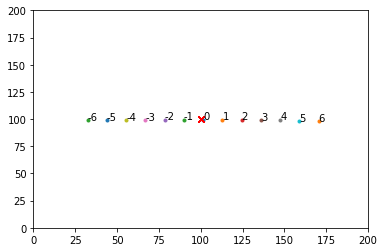

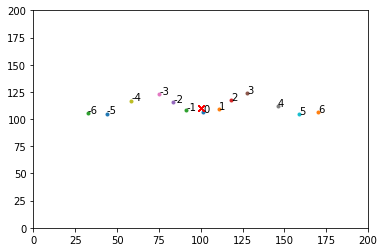

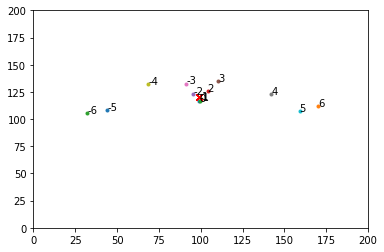

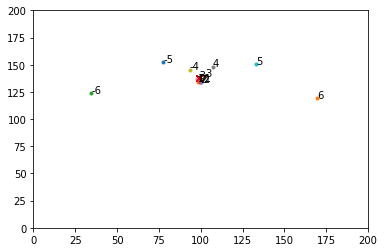

In [13]:
for k, img_bins in enumerate(mean_img_bins):
    plt.xlim(0,200)
    plt.ylim(0,200)
    legends = []
    for t in range(13):
        y,x = img_bins[1:,t]
        plt.plot(x,y, '.')
        plt.text(x,y, str(kex_headers.TOF_OFFSET_MAP[t]))
        y,x = recon_com[k][1:]
        plt.plot(x,y,color='r', marker='x')
        
    plt.show()

In [14]:
R_img_bins = []
midpoint_img_bins = []
tof_image_bins = []
fix_tof = 7
for k, d in enumerate(dictionaries):
    tof_lor = d['tof_lor'].copy()
    tof_lor = tof_lor[:, tof_lor[0]==fix_tof]
    tof_image_bins.append(representation.get_image_bins(tof_lor, timealign=True))
    tof_lor[0] = 0
    midpoint_img_bins.append(representation.get_image_bins(tof_lor, timealign=True))
    tof_lor[-1] = 250
    R_img_bins.append(representation.get_image_bins(tof_lor, timealign=False))
    

In [15]:
R_histo_images = []
midpoint_histo_images = []

for k, img_bins in enumerate(R_img_bins):
    R_histo_images.append(listmode.get_histogram(img_bins, kex_headers.IMAGE_SHAPE))
    midpoint_histo_images.append( listmode.get_histogram(midpoint_img_bins[k], kex_headers.IMAGE_SHAPE))

tof offset 4 R axis trace


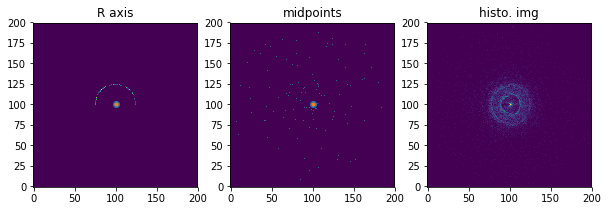

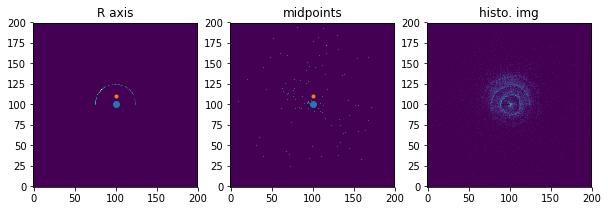

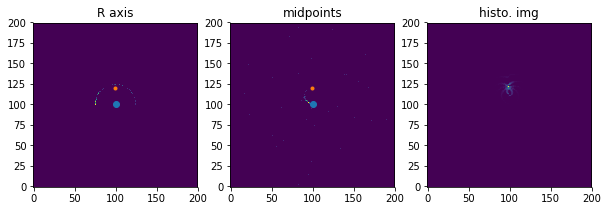

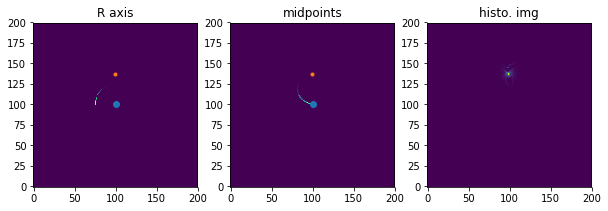

In [16]:
z = 47
print("tof offset", kex_headers.TOF_OFFSET_MAP[fix_tof],"R axis trace")
for k, h in enumerate(R_histo_images):
    plt.figure(figsize=(10,10))
    plt.subplot(1,3,1)
    plt.imshow(h[z], origin='down')
    plt.scatter([100], [100])
    plt.scatter(recon_com[k][2], recon_com[k][1], marker='.')
    plt.title("R axis")
    plt.subplot(1,3,2)
    plt.imshow(midpoint_histo_images[k][z], origin='down')
    plt.scatter([100], [100])
    plt.scatter(recon_com[k][2], recon_com[k][1], marker='.')
    plt.title("midpoints")
    
    plt.subplot(1,3,3)
    plt.imshow(image_histograms[k][z], origin='down')
    plt.title("histo. img")
    plt.show()

In [18]:
z_slice_widget = widgets.IntSlider(min=0, max=histograms[0].shape[0], value=47)

def f(z):
    plt.figure(figsize=(20,20))
    for k,h in enumerate(tof_histo_images):
        plt.subplot(2,len(tof_histo_images)/2,k+1)
        plt.imshow(h[z])
        plt.colorbar()
        s= 100
        if False:
            plt.scatter(recon_com[k][2], recon_com[k][1],color='r', marker='o', s=s)
            plt.scatter(com[k][2], com[k][1], color='y', marker='o', s= s)
            plt.scatter(direct_com[k][2], direct_com[k][1],color='g', marker='.', s=s)
            plt.scatter(tof_0_com[k][2], tof_0_com[k][1], color='w', marker='.', s=s)
            plt.legend([ "recon. com", "img. bins com", "direct com", "tof 0 com"])
        
        alpha = 0.3
        plt.axvline(x=[100],color='red', alpha=alpha)
        plt.axhline(y=[100],color='red',alpha=alpha)
    
interact(f, z=z_slice_widget);

NameError: name 'histograms' is not defined

In [ ]:
plt.subplot(np.histogram())

In [ ]:
fov_sinograms = []
delays_sinograms = []
outside_fov_sinograms = []
for k, d in enumerate(dictionaries):
    lors =  d['tof_lor'][1:]
    prompt_lors = lors[:,d['is_prompt']]
    delay_lors = lors[:,d['is_prompt'] == False]
    fov_lors = prompt_lors[:,d['is_image_fov']]
    outside_lors = promt_lors[:, d['is_image_fov'] == False]
    shape = kex_headers.LOR_HISTOGRAM_SHAPE
    fov_sinograms.append(listmode.histogram(fov_lors, shape))
    delays_sinograms.append(listmode.histogram(delay_lors, shape) )
    outside_fov_sinograms.append(listmode.histogram(outside_lors, shape))